In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
from itertools import chain

In [2]:
def func_y(time):
    freq = 50026.3*2.0*np.pi
    phase = 0
    y = 10000.0*np.sin(freq*time + phase)
    y = y*np.exp(-500.0*time)
    y = 0.5*y*(2 + np.sin(2000*time))
    if(time < 0.0004):
        y = 0;
    return y

def rand():
    r = random.gauss(0, 0.01)
    return r

def simple(time):
    freq = 54321.0987654321*2.0*np.pi
    phase = 0
    amp = 1
    amp = 1 + 0.1*np.sin(1000.0*time+phase)
    y = amp*np.sin(freq*time + phase)
    return y

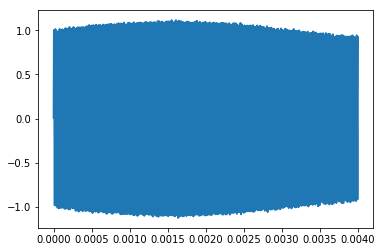

In [3]:

offset = 6548.8
offset = 60000
sample_freq = 1000000 #hz

signal_length = 0.004 #seconds

n_samples = int(sample_freq*signal_length)

times = np.empty(0)
vals = np.empty(0)

for i in range(0,n_samples):
    time = float(i)/float(sample_freq)

    val = func_y(time)
    val = val + offset
    #to make simple sine up comment this line
    val = simple(time)
    val = val + rand()
    
    times = np.append(times, time)
    vals = np.append(vals, val)
    list = [time,",",val]

#############################################
plt.plot(times,vals,'-',lw=2)
#plt.plot(time,signal, '-', lw=2)
plt.show()

####random shuffling does nothing####
#a = times
#b = vals
#c = np.c_[a.reshape(len(a), -1), b.reshape(len(b), -1)]
#np.random.shuffle(c)
#a2 = c[:, :a.size//len(a)].reshape(a.shape)
#b2 = c[:, a.size//len(a):].reshape(b.shape)
#plt.plot(b2,"go")
#plt.show()
#####################################

#f= open("../data/simple.txt","w")
f= open("data/test2.txt","w")

zip(times,vals)
writer = csv.writer(f, delimiter=',')
writer.writerows(zip(times,vals))
f.close()

